In [12]:
pwd

'/content'

In [11]:
!git clone https://github.com/rgrupesh/test.git

Cloning into 'test'...
remote: Enumerating objects: 10016, done.
remote: Counting objects: 100% (10016/10016), done.
remote: Compressing objects: 100% (9940/9940), done.
remote: Total 10016 (delta 73), reused 10013 (delta 73), pack-reused 0
Receiving objects: 100% (10016/10016), 9.53 MiB | 4.11 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import os

In [14]:
labels = []
images = []

for i in range(0,10):
    img = os.listdir("test/Data/" + str(i))
    for j in img:
        c_img = cv2.imread("test/Data/" + str(i) + "/" + str(j))
        img_resize = cv2.resize(c_img, (28,28))
        images.append(img_resize)
        labels.append(i)

In [15]:
print(f" images= {len(images)} labels={len(labels)}")

 images= 10160 labels=10160


In [21]:
images = np.array(images)
labels = np.array(labels)

print(f" images_shape={images.shape} labels_shape={labels.shape}")

 images_shape=(10160, 28, 28, 3) labels_shape=(10160,)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)
print(f"{train_images.shape} {test_images.shape}")

(8128, 28, 28, 3) (2032, 28, 28, 3)


In [24]:
train_images,  val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)
print(f"{train_images.shape} {val_images.shape}")

(6502, 28, 28, 3) (1626, 28, 28, 3)


In [25]:
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    img = img/255
    return img

In [26]:
train_images = np.array(list(map(preProcessing,train_images)))
val_images = np.array(list(map(preProcessing,val_images)))
test_images = np.array(list(map(preProcessing,test_images)))

print(f"{train_images.shape} {val_images.shape} {test_images.shape}")

(6502, 28, 28) (1626, 28, 28) (2032, 28, 28)


In [27]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
val_images = val_images.reshape(val_images.shape[0], 28, 28, 1)

print(f"{train_images.shape} {val_images.shape} {test_images.shape}")

(6502, 28, 28, 1) (1626, 28, 28, 1) (2032, 28, 28, 1)


In [28]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [29]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [30]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

In [31]:
history = model.fit(datagen.flow(train_images, train_labels),
                              epochs = 20, batch_size=128, validation_data = (val_images, val_labels))

Epoch 1/20
204/204 [==============================] - 3s 13ms/step - loss: 1.9942 - accuracy: 0.2613 - val_loss: 0.6494 - val_accuracy: 0.8198
Epoch 2/20
204/204 [==============================] - 2s 11ms/step - loss: 0.8659 - accuracy: 0.7118 - val_loss: 0.1313 - val_accuracy: 0.9582
Epoch 3/20
204/204 [==============================] - 2s 11ms/step - loss: 0.4824 - accuracy: 0.8457 - val_loss: 0.0855 - val_accuracy: 0.9779
Epoch 4/20
204/204 [==============================] - 2s 11ms/step - loss: 0.3432 - accuracy: 0.8963 - val_loss: 0.0679 - val_accuracy: 0.9791
Epoch 5/20
204/204 [==============================] - 2s 11ms/step - loss: 0.3026 - accuracy: 0.9050 - val_loss: 0.0590 - val_accuracy: 0.9852
Epoch 6/20
204/204 [==============================] - 2s 11ms/step - loss: 0.2641 - accuracy: 0.9179 - val_loss: 0.0400 - val_accuracy: 0.9889
Epoch 7/20
204/204 [==============================] - 2s 11ms/step - loss: 0.2349 - accuracy: 0.9268 - val_loss: 0.0521 - val_accuracy: 0.9834

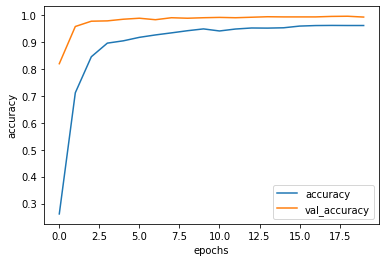

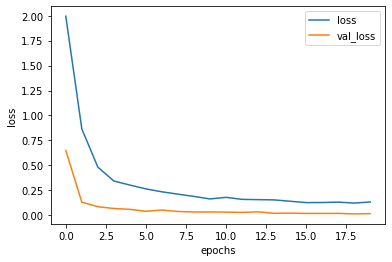

In [33]:
def show_plot(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_" + string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.legend([string,"val_" + string])
    plt.show()
    
show_plot(history,"accuracy")  
show_plot(history,"loss")

In [34]:
score = model.evaluate(test_images, test_labels, verbose=1)
print('Test Score : ', score[0])
print('Test Accuracy : ', score[1])

64/64 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9941
Test Score :  0.016306091099977493
Test Accuracy :  0.9940944910049438


In [35]:
model.save("digitRecognizer.h5")